In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 경고 뜨지 않게
import warnings
warnings.filterwarnings('ignore')

#저장라이브러리
import pickle

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# LabelEncoder
from sklearn.preprocessing import LabelEncoder

# 데이터를 학습용과 검증용으로 나눈다.
from sklearn.model_selection import train_test_split

import os

In [2]:
# 데이터 불러오기
df1 = pd.read_csv('to_csv_all/to_csv/train/train_병합/train_3_매출정보.csv')

In [3]:
# 막대 위에 숫자 표시 함수
def annotate_countplot(ax, spacing=5):
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax.annotate(f'{int(height):,}',  # 예: 1,234
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, spacing),
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=10)

In [71]:
def plot_and_count_zero(df, column_name):
    # 고유값 정렬
    order = sorted(df[column_name].unique())
    
    # 카운트플롯
    ax = sns.countplot(data=df, x=column_name, hue=column_name, order=order)
    annotate_countplot(ax)
    plt.show()
    
    # 0 값 개수 계산
    zero_count = (df[column_name] == 0).sum()
    total = len(df)
    print(f"0값 개수: {zero_count} ({zero_count / total:.2%})")

    # 3 값 개수 계산
    third_count = (df[column_name] == 3).sum()
    total = len(df)
    print(f"3값 개수: {third_count} ({third_count / total:.2%})")

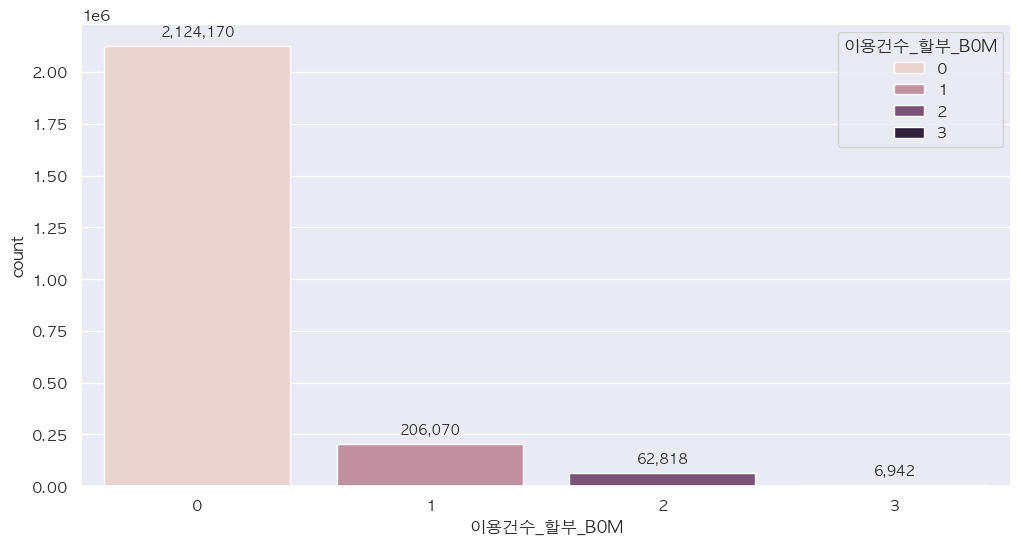

0값 개수: 2124170 (88.51%)


In [5]:
# 비율 확인하기
plot_and_count_zero(df1, '이용건수_할부_B0M')

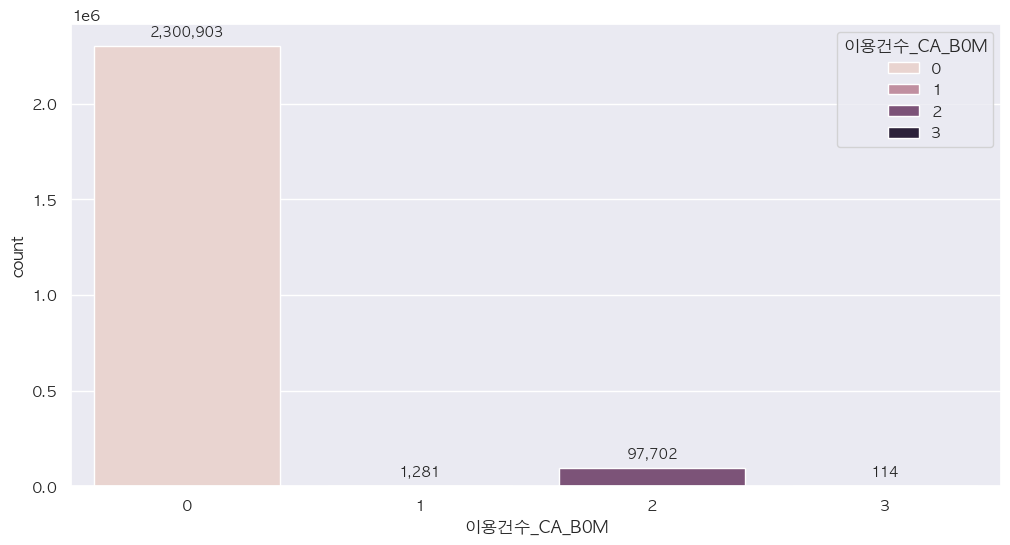

0값 개수: 2300903 (95.87%)


In [6]:
# 비율 확인하기
plot_and_count_zero(df1, '이용건수_CA_B0M')

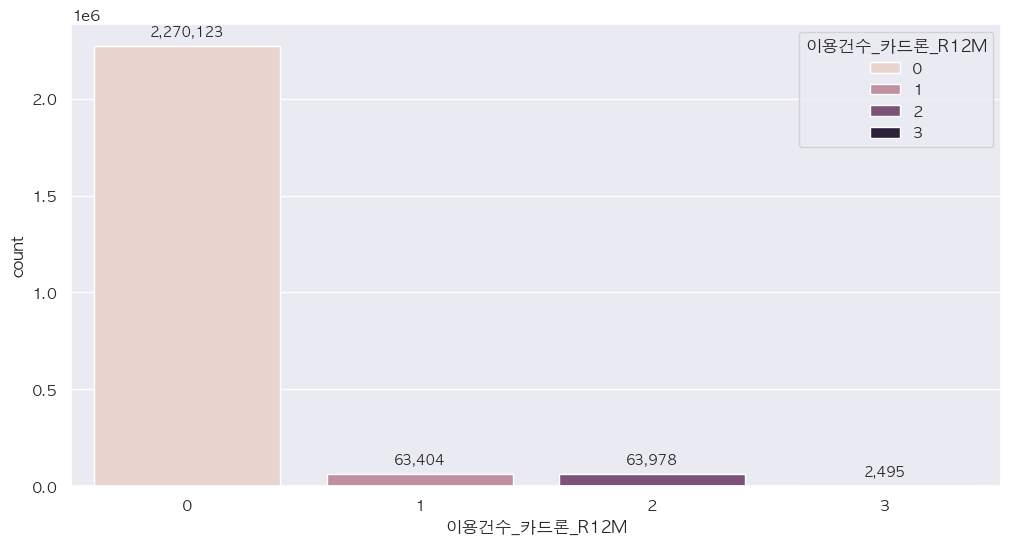

0값 개수: 2270123 (94.59%)


In [7]:
# 비율 확인하기
plot_and_count_zero(df1, '이용건수_카드론_R12M')

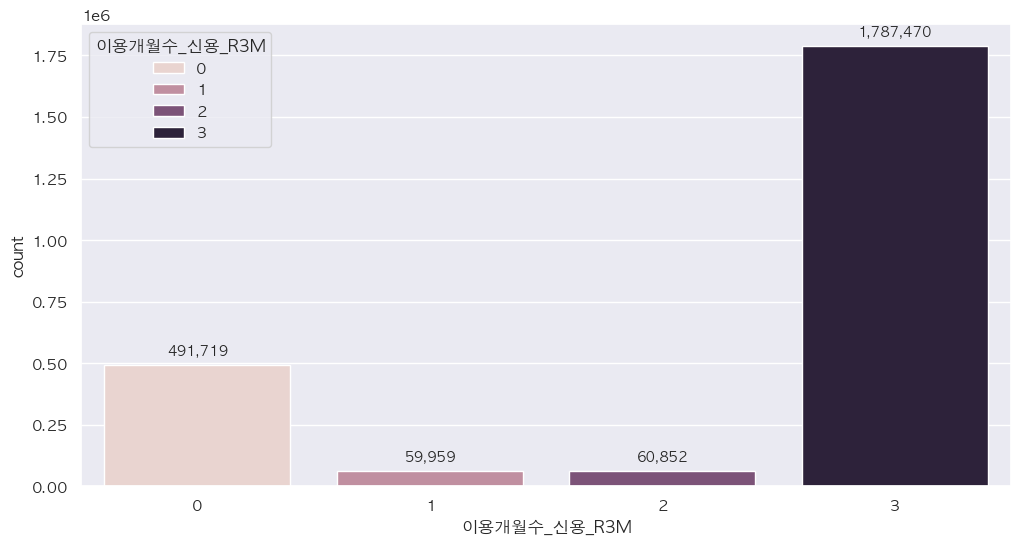

0값 개수: 491719 (20.49%)
3값 개수: 1787470 (74.48%)


In [73]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_신용_R3M')

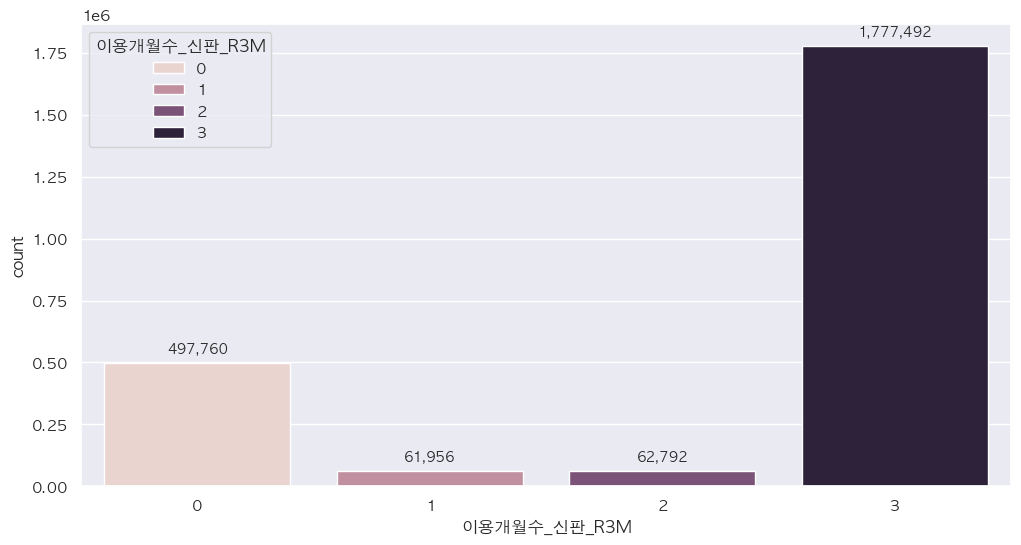

0값 개수: 497760 (20.74%)


In [9]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_신판_R3M')

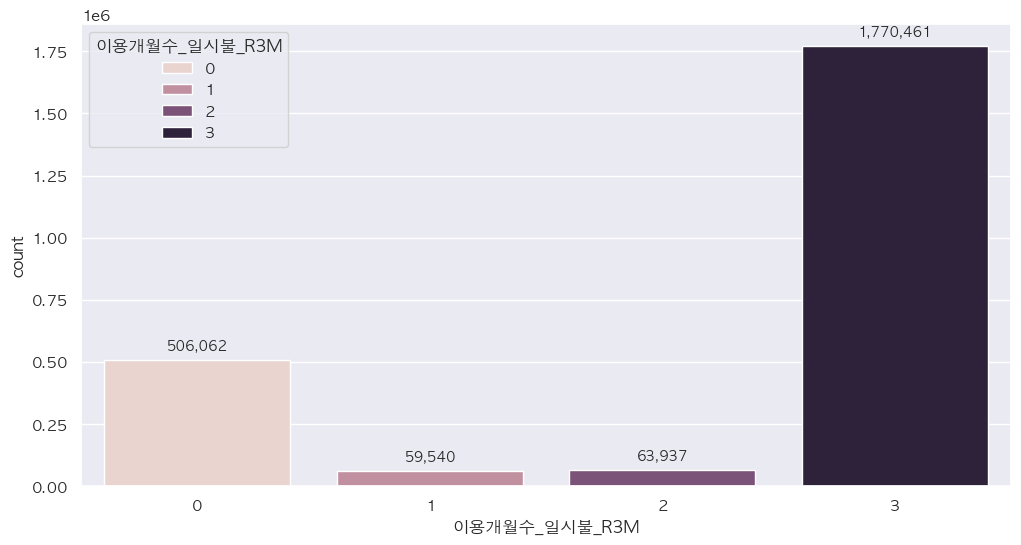

0값 개수: 506062 (21.09%)
0값 개수: 1770461 (73.77%)


In [69]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_일시불_R3M')

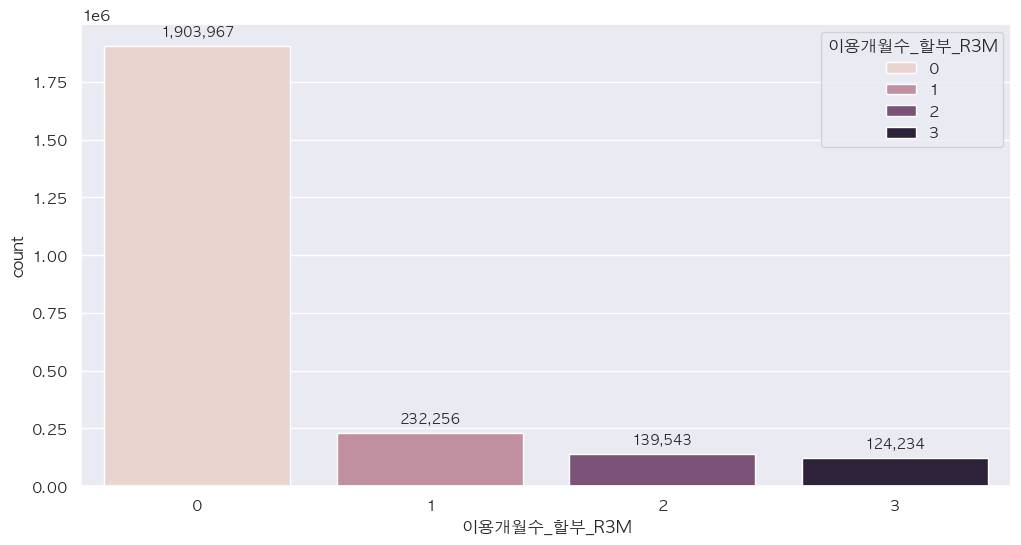

0값 개수: 1903967 (79.33%)


In [11]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_할부_R3M')

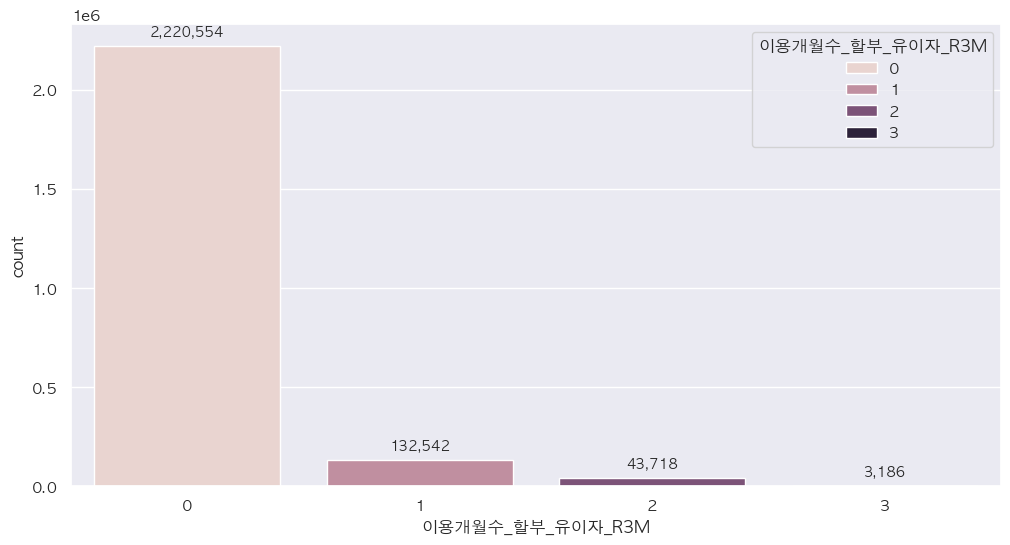

0값 개수: 2220554 (92.52%)


In [12]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_할부_유이자_R3M')

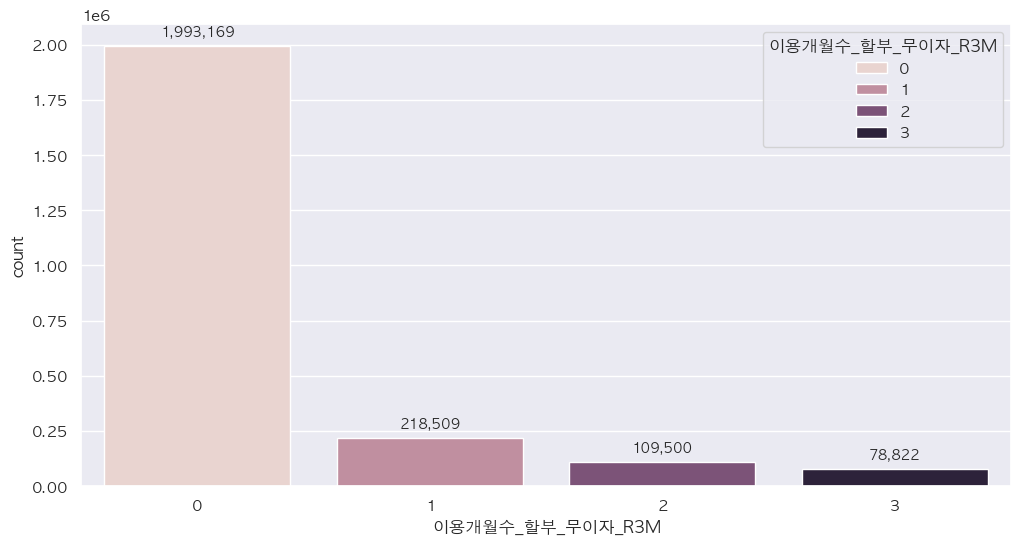

0값 개수: 1993169 (83.05%)


In [13]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_할부_무이자_R3M')

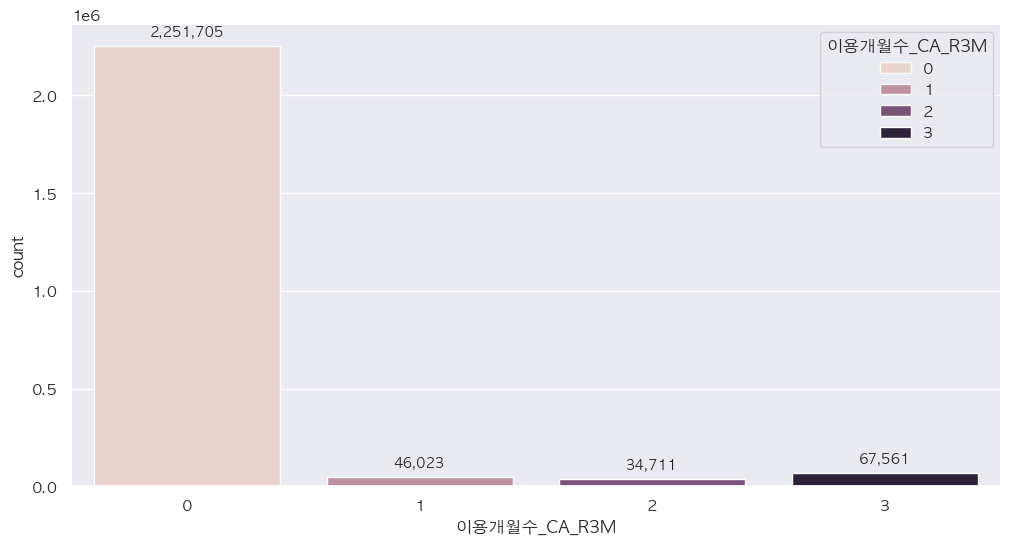

0값 개수: 2251705 (93.82%)


In [14]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_CA_R3M')

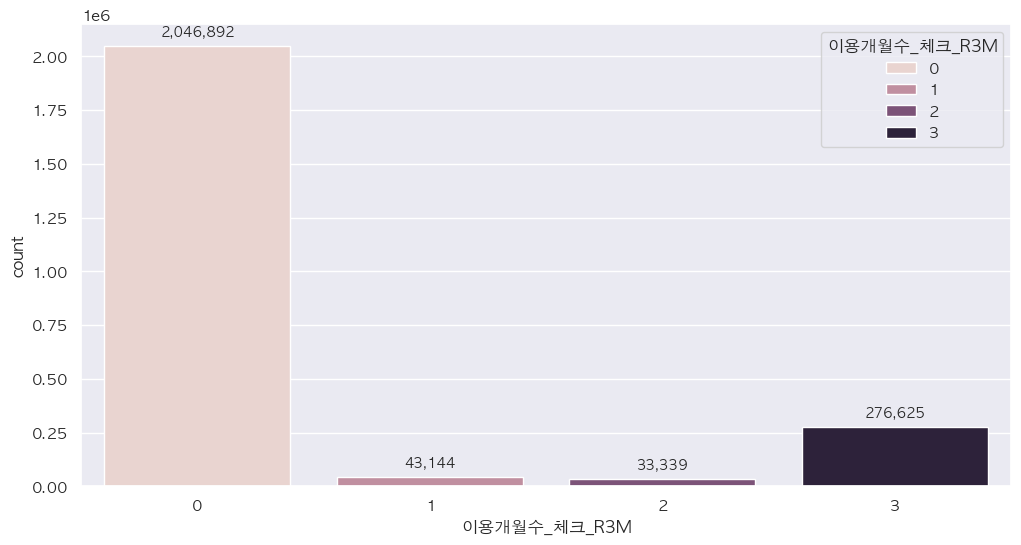

0값 개수: 2046892 (85.29%)


In [15]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_체크_R3M')

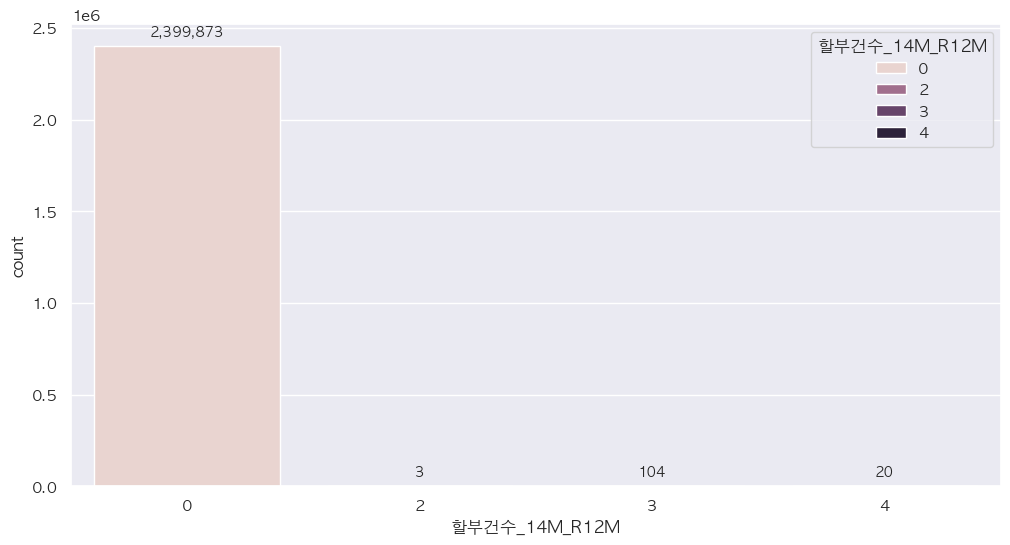

0값 개수: 2399873 (99.99%)


In [16]:
# 비율 확인하기
plot_and_count_zero(df1, '할부건수_14M_R12M')

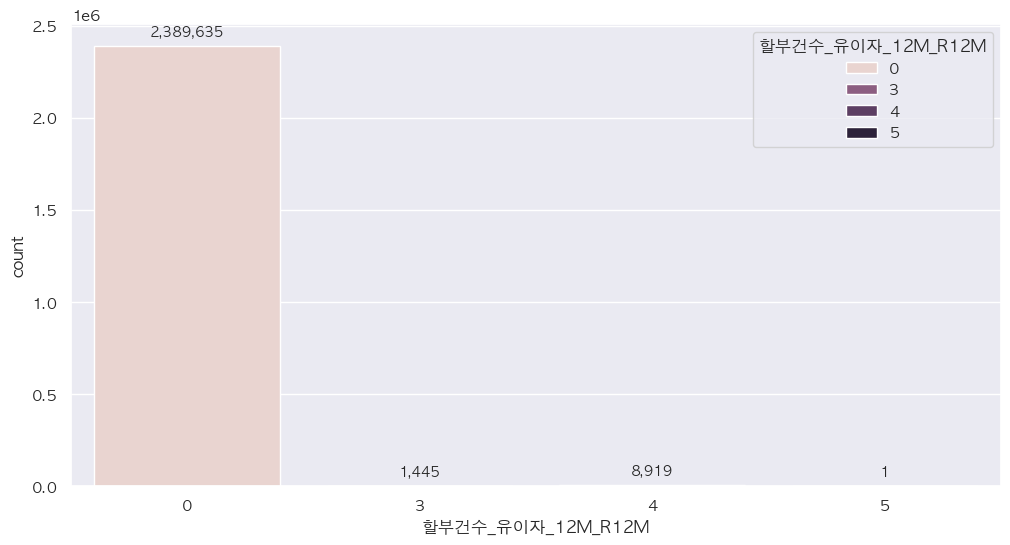

0값 개수: 2389635 (99.57%)


In [17]:
# 비율 확인하기
plot_and_count_zero(df1, '할부건수_유이자_12M_R12M')

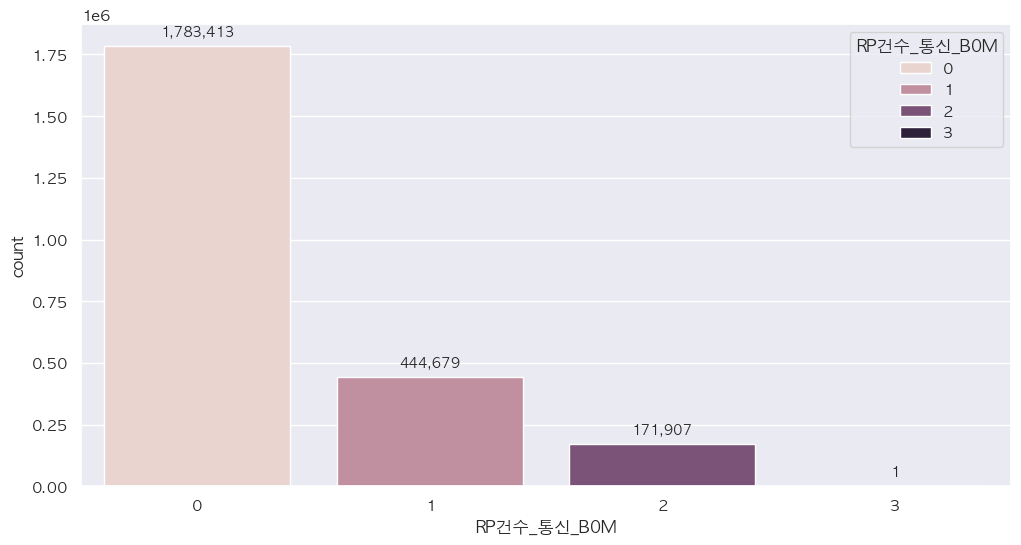

0값 개수: 1783413 (74.31%)


In [18]:
# 비율 확인하기
plot_and_count_zero(df1, 'RP건수_통신_B0M')

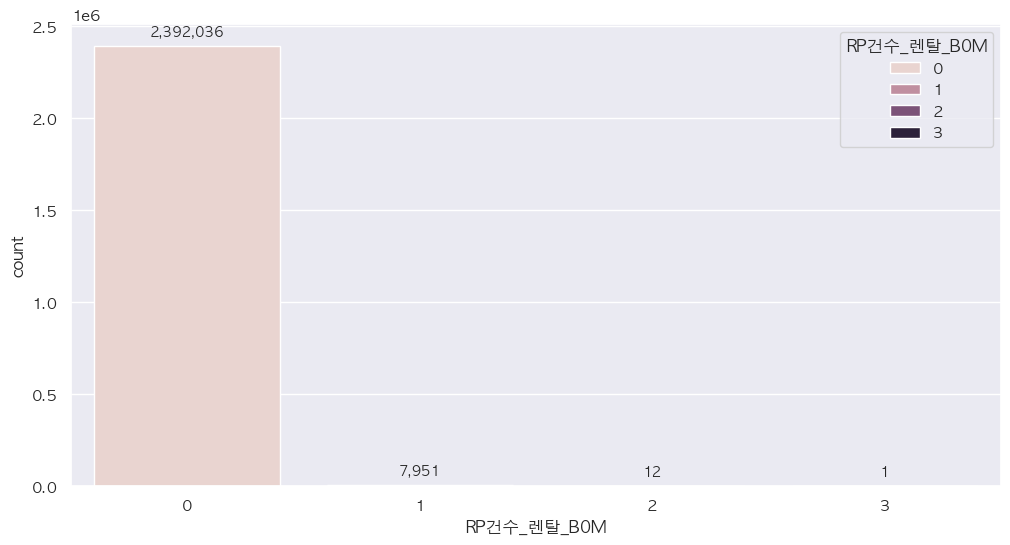

0값 개수: 2392036 (99.67%)


In [19]:
# 비율 확인하기
plot_and_count_zero(df1, 'RP건수_렌탈_B0M')

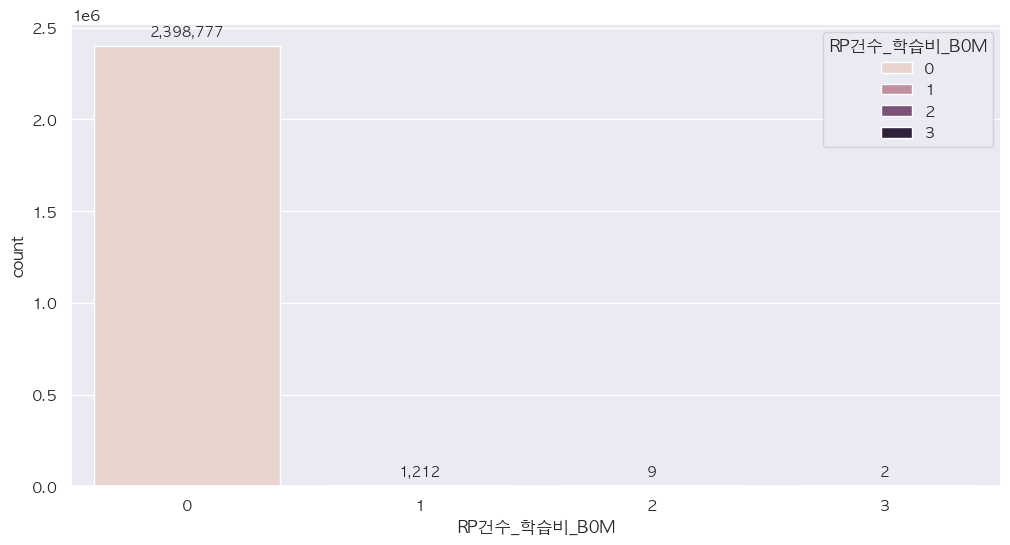

0값 개수: 2398777 (99.95%)


In [20]:
# 비율 확인하기
plot_and_count_zero(df1, 'RP건수_학습비_B0M')

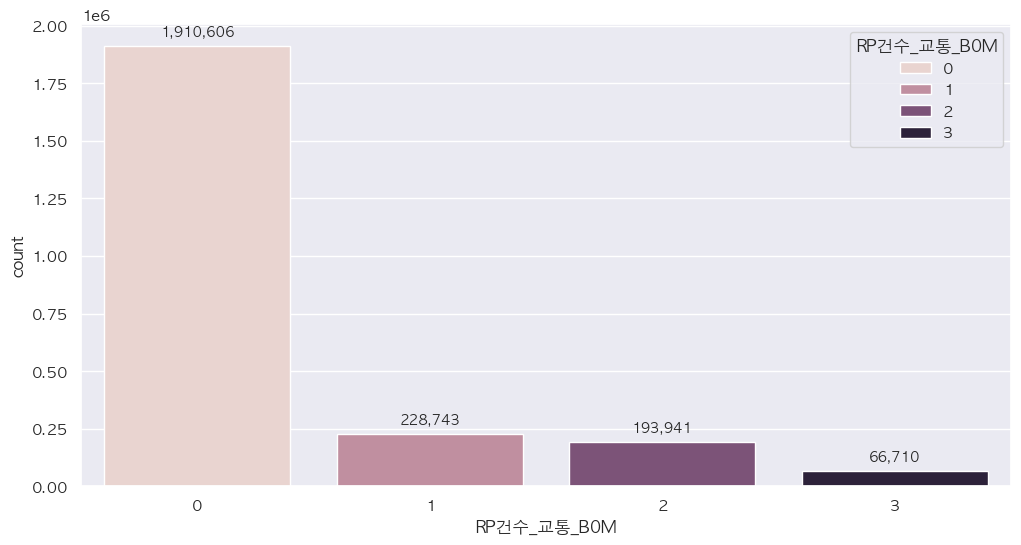

0값 개수: 1910606 (79.61%)


In [21]:
# 비율 확인하기
plot_and_count_zero(df1, 'RP건수_교통_B0M')

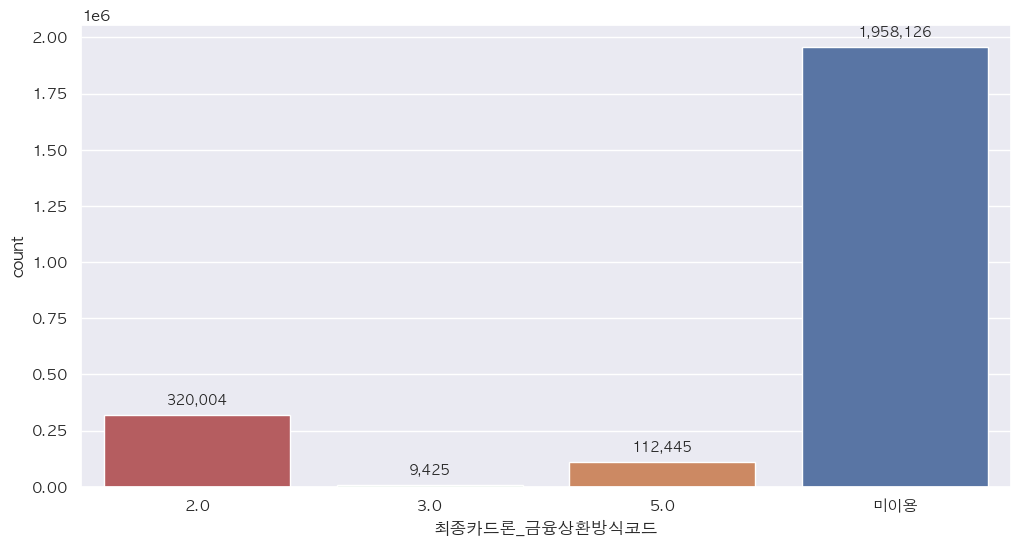

0값 개수: 0 (0.00%)


In [22]:
# 비율 확인하기
plot_and_count_zero(df1, '최종카드론_금융상환방식코드')

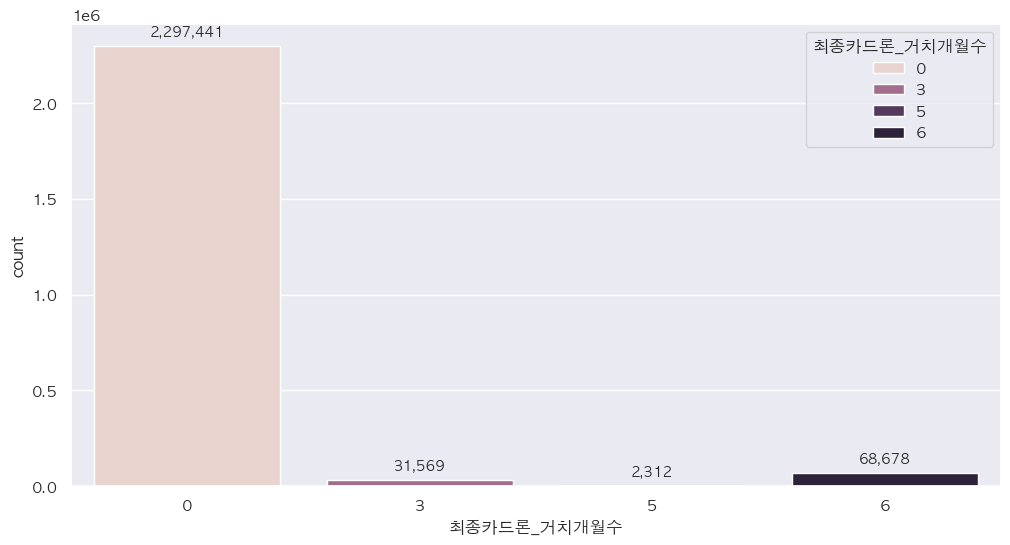

0값 개수: 2297441 (95.73%)


In [23]:
# 비율 확인하기
plot_and_count_zero(df1, '최종카드론_거치개월수')

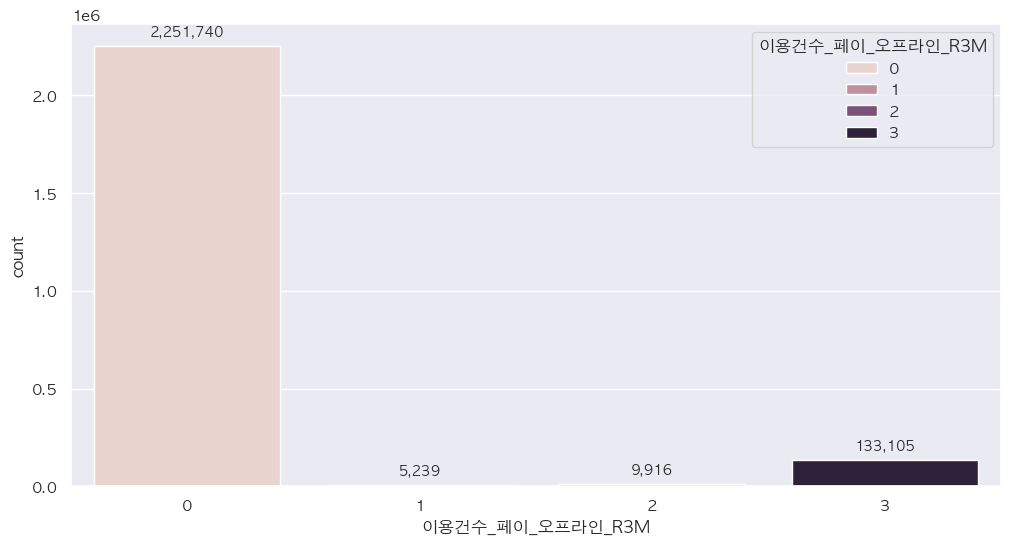

0값 개수: 2251740 (93.82%)


In [24]:
# 비율 확인하기
plot_and_count_zero(df1, '이용건수_페이_오프라인_R3M')

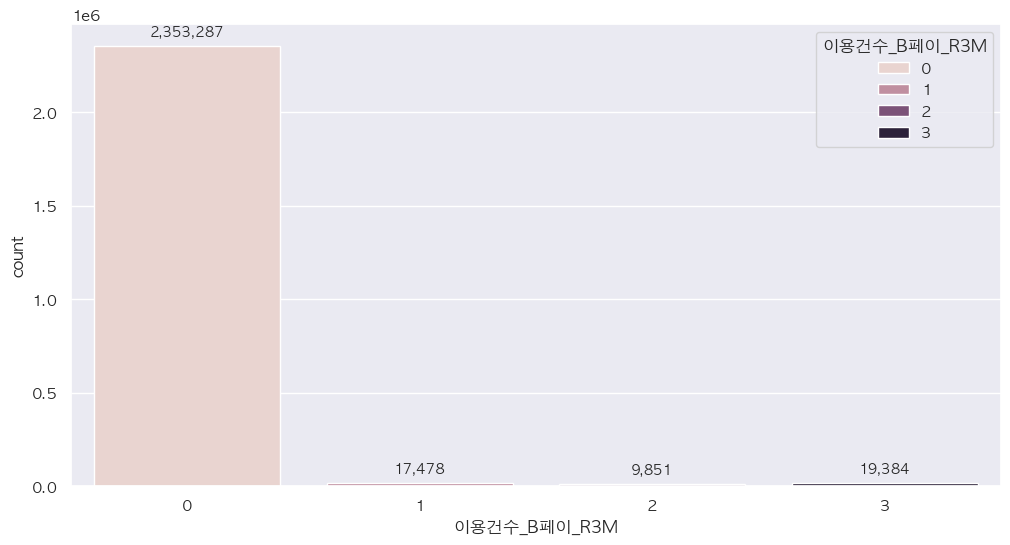

0값 개수: 2353287 (98.05%)


In [25]:
# 비율 확인하기
plot_and_count_zero(df1, '이용건수_B페이_R3M')

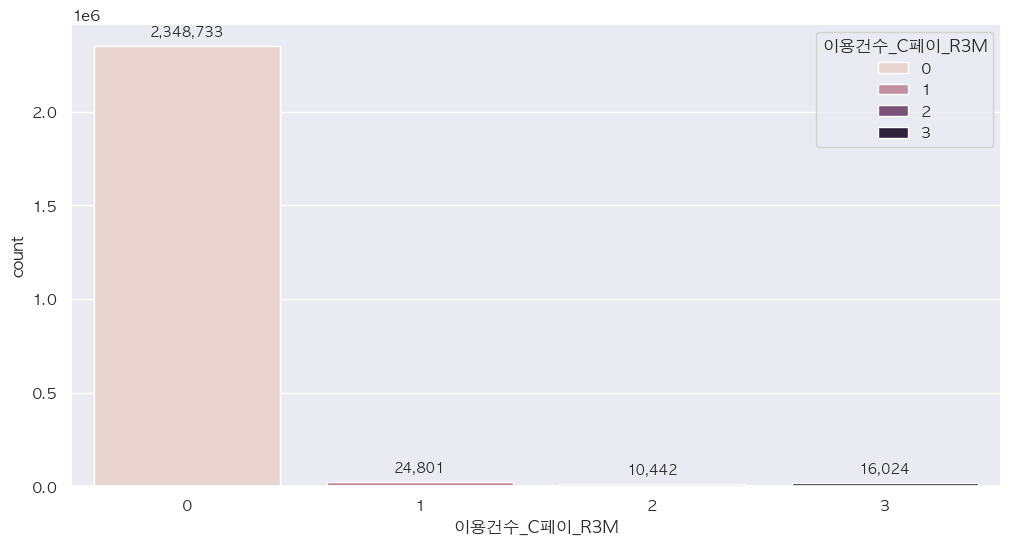

0값 개수: 2348733 (97.86%)


In [26]:
# 비율 확인하기
plot_and_count_zero(df1, '이용건수_C페이_R3M')

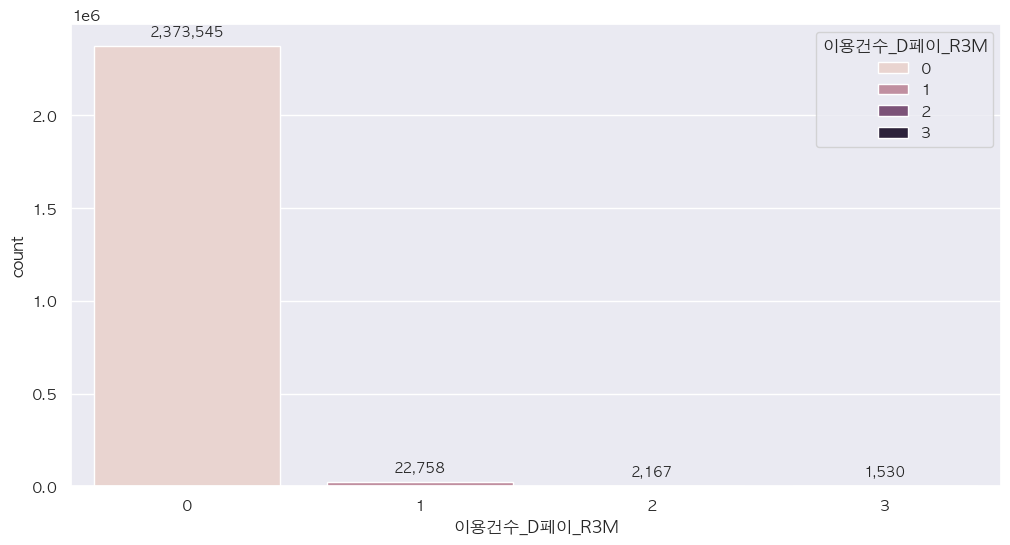

0값 개수: 2373545 (98.90%)


In [27]:
# 비율 확인하기
plot_and_count_zero(df1, '이용건수_D페이_R3M')

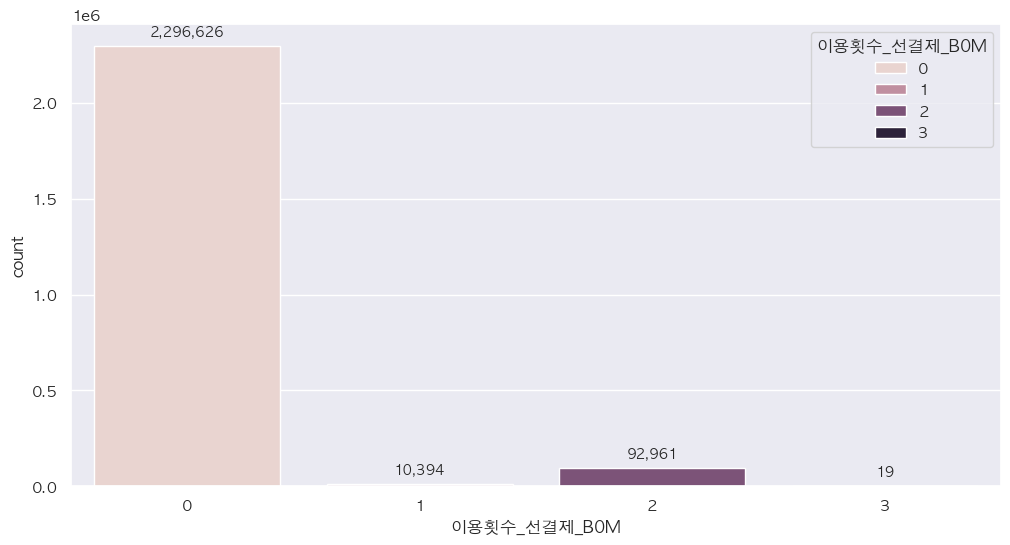

0값 개수: 2296626 (95.69%)


In [28]:
# 비율 확인하기
plot_and_count_zero(df1, '이용횟수_선결제_B0M')

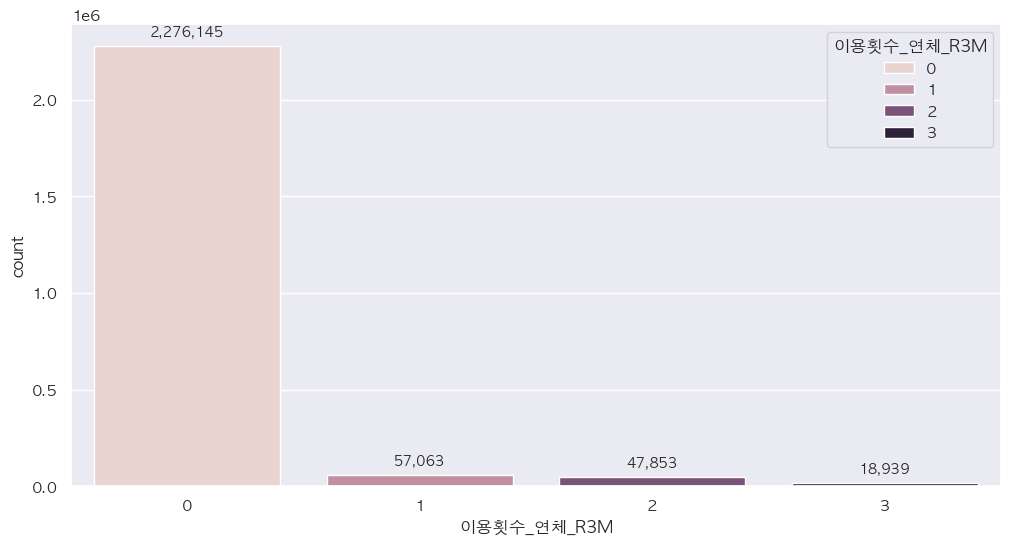

0값 개수: 2276145 (94.84%)


In [29]:
# 비율 확인하기
plot_and_count_zero(df1, '이용횟수_연체_R3M')

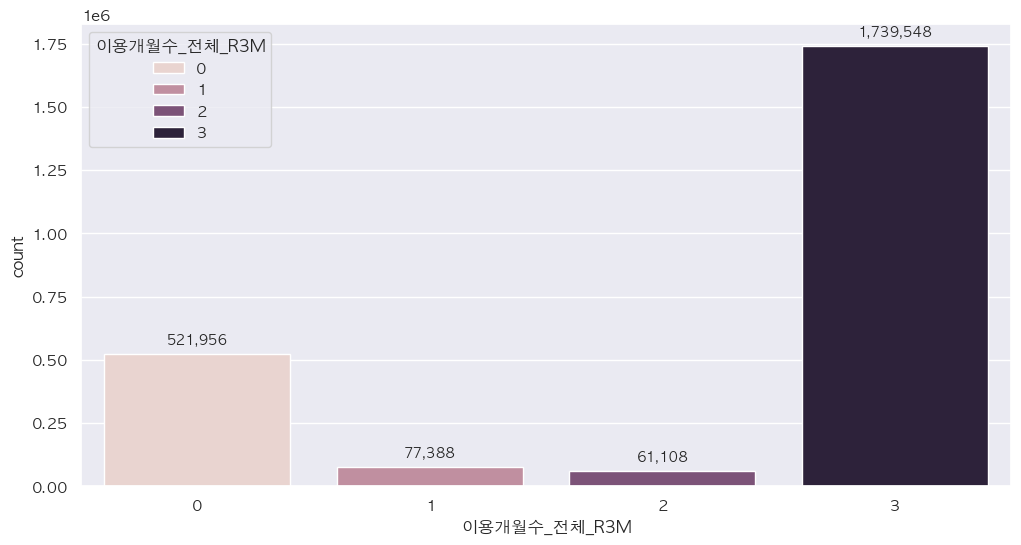

0값 개수: 521956 (21.75%)


In [30]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_전체_R3M')

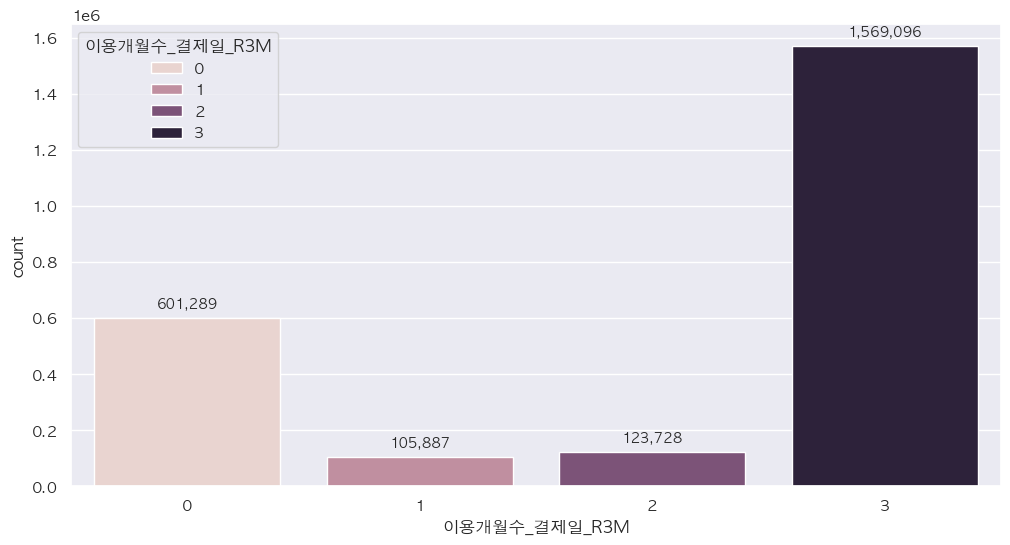

0값 개수: 601289 (25.05%)


In [31]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_결제일_R3M')

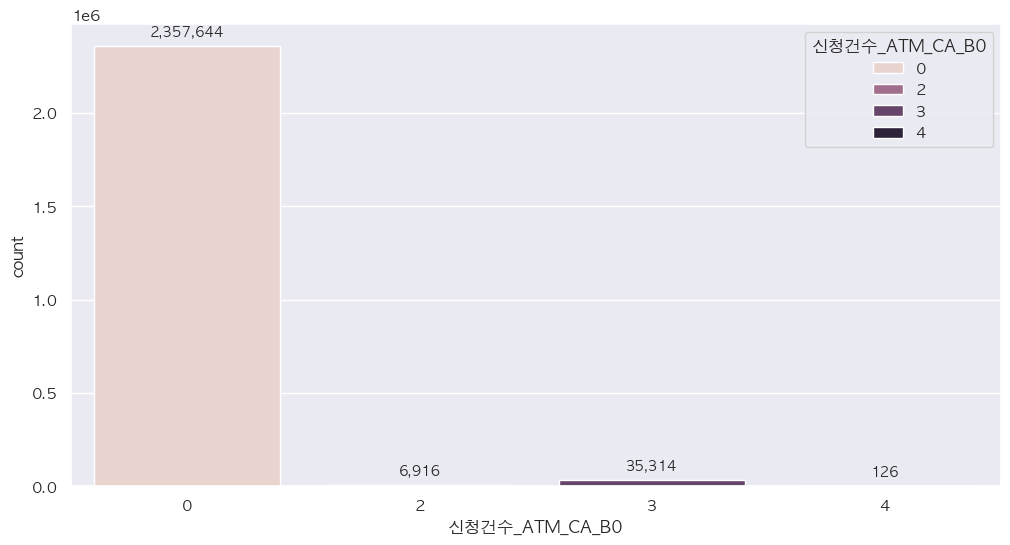

0값 개수: 2357644 (98.24%)


In [32]:
# 비율 확인하기
plot_and_count_zero(df1, '신청건수_ATM_CA_B0')

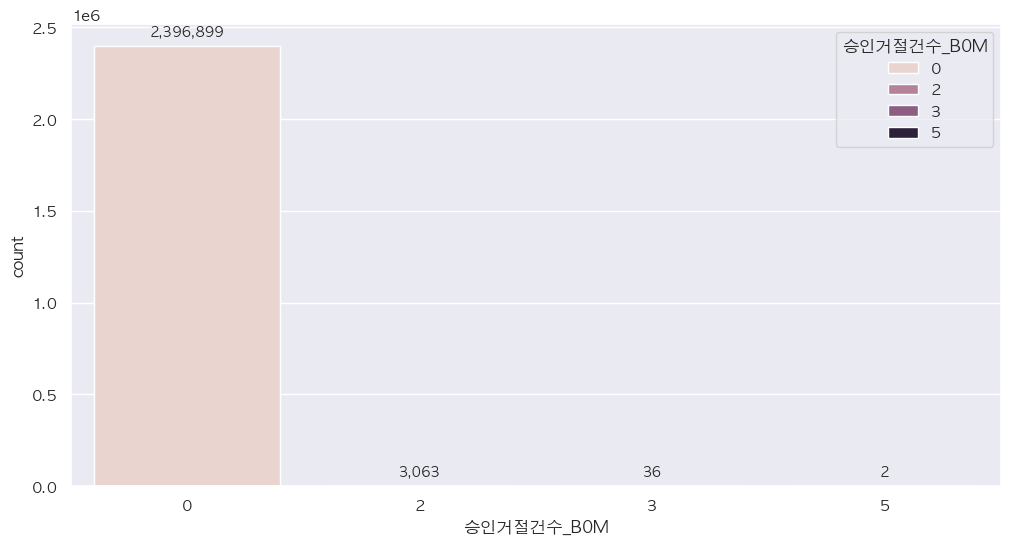

0값 개수: 2396899 (99.87%)


In [33]:
# 비율 확인하기
plot_and_count_zero(df1, '승인거절건수_B0M')